In [1]:
from __future__ import print_function
import numpy as np
from ifqi.envs.lqg1d import LQG1D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

env = LQG1D()
K = env.computeOptimalK()
print('Optimal K: {}'.format(K))
S = 0.001  # covariance of the controller
print('Covariance S: {}'.format(S))

Optimal K: [[-0.61525125]]
Covariance S: 0.001


In [2]:
class Regressor(object):
    def __init__(self, b=0, k=0):
        self.b = b
        self.k = k

    def fit(self, X, y):
        (self.b, self.k), pcov = curve_fit(self.Q, X, y)
        print("fitted b: {}  k: {} ".format(self.b, self.k))

    def Q(self, sa, b, k):
        s, a = sa[:, 0], sa[:, 1]
        return b * a ** 2 - (a - k * s) ** 2

    def predict(self, X):
        return self.Q(X, self.b, self.k)


In [3]:
regressor = Regressor()

Q = []
for x in np.linspace(-10, 10, 10):
    for a in np.linspace(-8, 8, 10):
        v = env.computeQFunction(x, a, K, S, 100)
        Q.append([x, a, v])
Q = np.array(Q)

fitted b: -1.388311932351905  k: -1.5127627128108294 


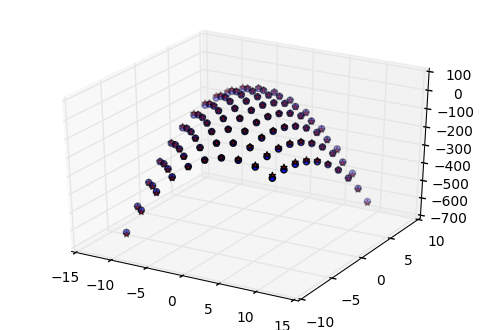

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Q[:, 0], Q[:, 1], Q[:, 2], c='b', marker='o')

regressor.fit(Q[:,0:2], Q[:,2])
pred = regressor.predict(Q[:,0:2])
ax.scatter(Q[:, 0], Q[:, 1], pred, c='r', marker='*')

plt.show()